Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('hr_employee_churn_data.csv')

In [3]:
df.head()

empid  satisfaction_level  last_evaluation  number_project  \
0      1                0.38             0.53               2   
1      2                0.80             0.86               5   
2      3                0.11             0.88               7   
3      4                0.72             0.87               5   
4      5                0.37             0.52               2   

   average_montly_hours  time_spend_company  Work_accident  \
0                   157                   3              0   
1                   262                   6              0   
2                   272                   4              0   
3                   223                   5              0   
4                   159                   3              0   

   promotion_last_5years  salary  left  
0                      0     low     1  
1                      0  medium     1  
2                      0  medium     1  
3                      0     low     1  
4                      0     low     1

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   empid                  14999 non-null  int64  
 1   satisfaction_level     14997 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   salary                 14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 1.1+ MB


In [5]:
df.shape

(14999, 10)

In [6]:
df.describe()

empid  satisfaction_level  last_evaluation  number_project  \
count  14999.000000        14997.000000     14999.000000    14999.000000   
mean    7500.000000            0.612863         0.716102        3.803054   
std     4329.982679            0.248634         0.171169        1.232592   
min        1.000000            0.090000         0.360000        2.000000   
25%     3750.500000            0.440000         0.560000        3.000000   
50%     7500.000000            0.640000         0.720000        4.000000   
75%    11249.500000            0.820000         0.870000        5.000000   
max    14999.000000            1.000000         1.000000        7.000000   

       average_montly_hours  time_spend_company  Work_accident  \
count          14999.000000        14999.000000   14999.000000   
mean             201.050337            3.498233       0.144610   
std               49.943099            1.460136       0.351719   
min               96.000000            2.000000       0.000000   
25%              156.000000            3.000000       0.000000   
50%              200.000000            3.000000       0.000000   
75%              245.000000            4.000000       0.000000   
max              310.000000           10.000000       1.000000   

       promotion_last_5years          left  
count           14999.000000  14999.000000  
mean                0.021268      0.238083  
std                 0.144281      0.425924  
min                 0.000000      0.000000  
25%                 0.000000      0.000000  
50%                 0.000000      0.000000  
75%                 0.000000      0.000000  
max                 1.000000      1.000000

In [7]:
df['Work_accident'].unique()

array([0, 1], dtype=int64)

In [8]:
df['promotion_last_5years'].unique()

array([0, 1], dtype=int64)

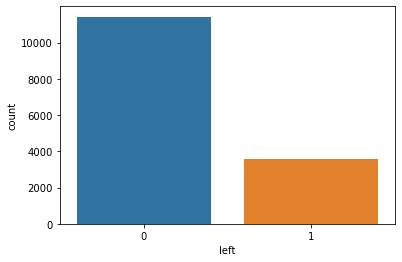

In [11]:
sns.countplot(x='left',data=df)
plt.show()
# from graph we can say in the training dataset, less people has left , datset don't look balanced

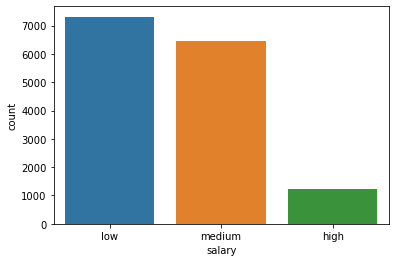

In [15]:
sns.countplot(x='salary',data=df)
# we are seeing high number of low salaried employee in given dataset

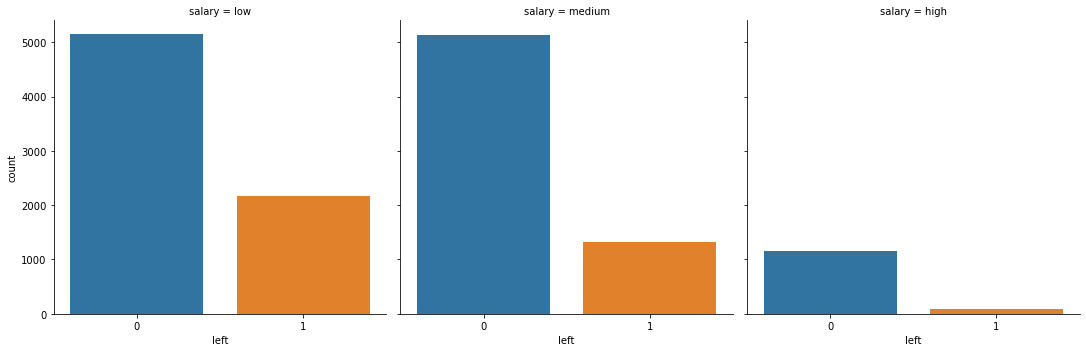

In [16]:
#graph with left and salary
sns.catplot(x='left',col='salary',kind='count',data=df)
# low salary employee are leaving more

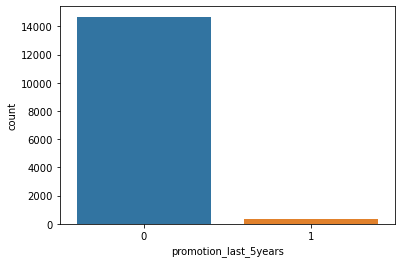

In [17]:
sns.countplot(x='promotion_last_5years',data=df)


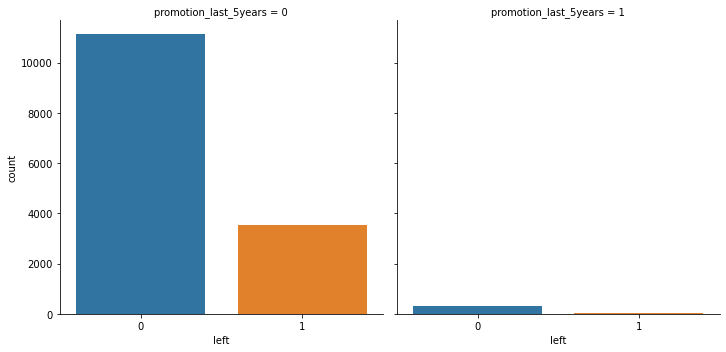

In [18]:
sns.catplot(x='left',col='promotion_last_5years',kind='count',data=df)
# non promoted employee has high chance of leaving

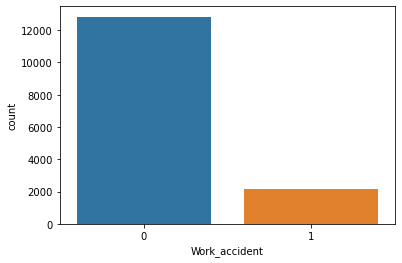

In [19]:
sns.countplot(x='Work_accident',data=df)

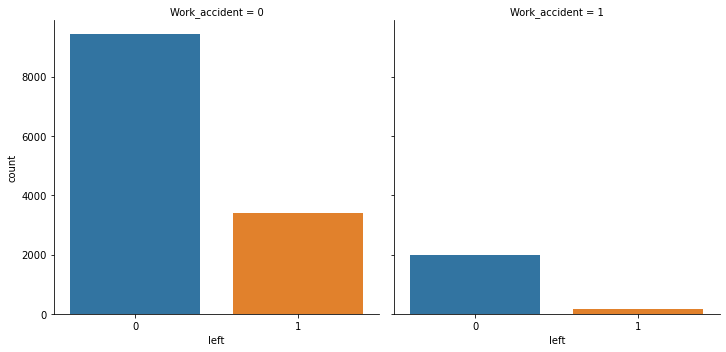

In [20]:
sns.catplot(x='left',col='Work_accident',kind='count',data=df)
# this feature don't seems much important as we can see employee with 0 work accident left the organization

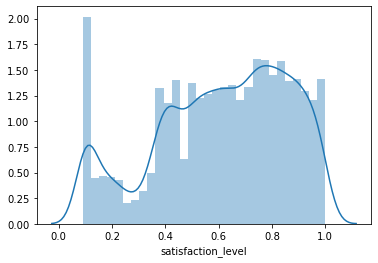

In [21]:
sns.distplot(df['satisfaction_level'])

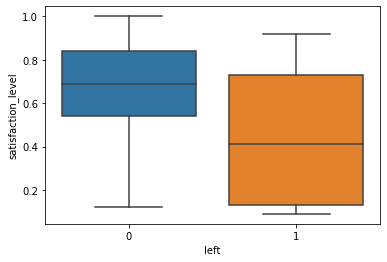

In [23]:
#using boxplot to show the distribution with respect to categories
sns.boxplot(x='left',y='satisfaction_level',data=df)
# most employee left having satisfaction level between 0.2 to 0.6

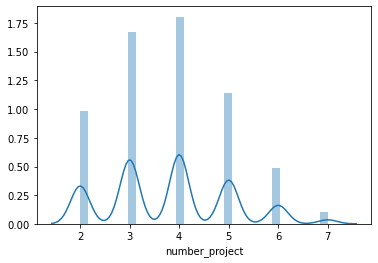

In [24]:
sns.distplot(df['number_project'])
#Number of projects distributed from 2 to 7 where i has high count of 4

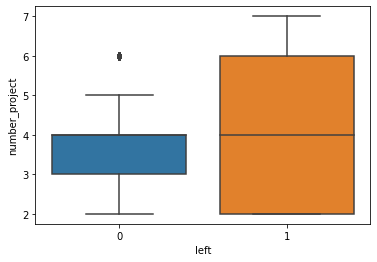

In [25]:
sns.boxplot(x='left',y='number_project',data=df)
#employee retain if project count is between 3 to 4 and left if project count is high

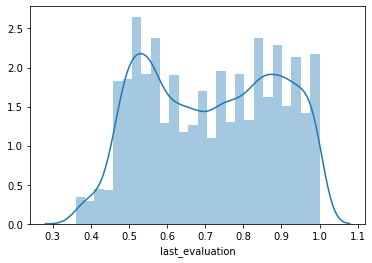

In [26]:
sns.distplot(df['last_evaluation'])

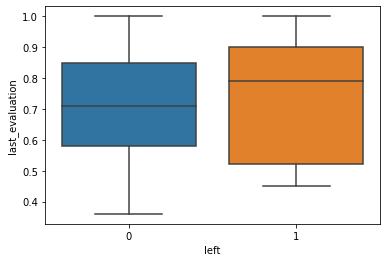

In [27]:
sns.boxplot(x='left',y='last_evaluation',data=df)
# employee left who has high last evaluation

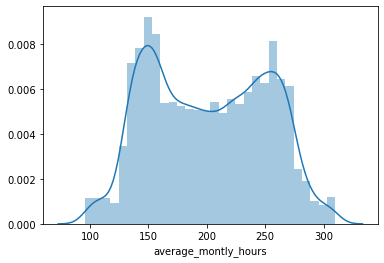

In [29]:
sns.distplot(df['average_montly_hours'])
#average montly hours distributed from 100 to 300 where it has high count around 150

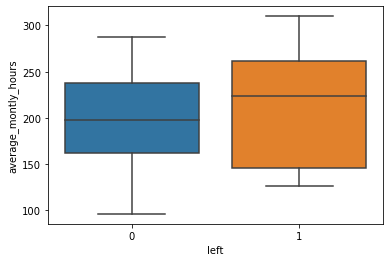

In [30]:
sns.boxplot(x='left',y='average_montly_hours',data=df)
# employee left who has high average monthly_hours value

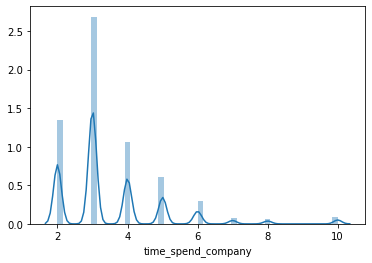

In [31]:
sns.distplot(df['time_spend_company'])

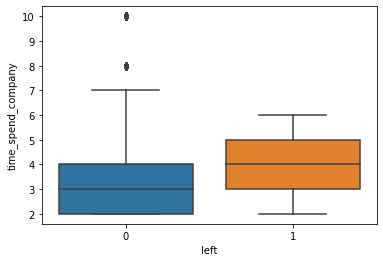

In [32]:
sns.boxplot(x='left',y='time_spend_company',data=df)
# employee left who has high time_spend value 

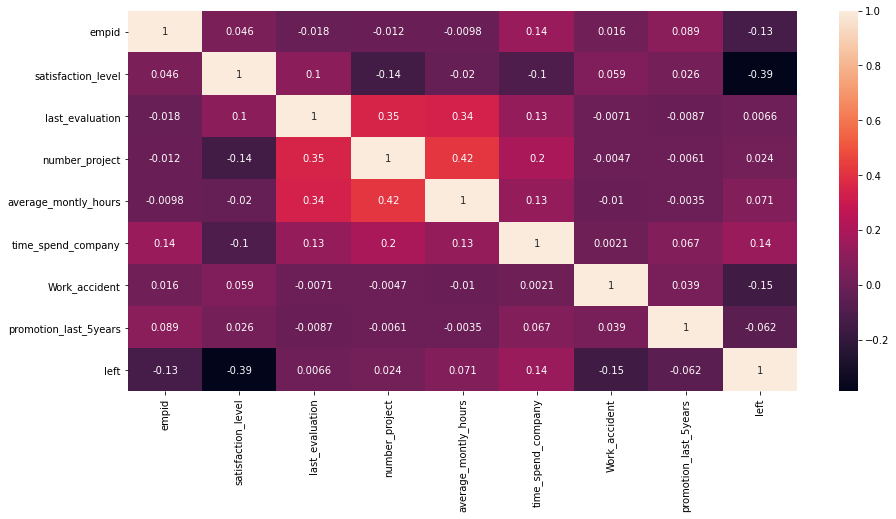

In [12]:
# checking for correlation 
cor_mat=df.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

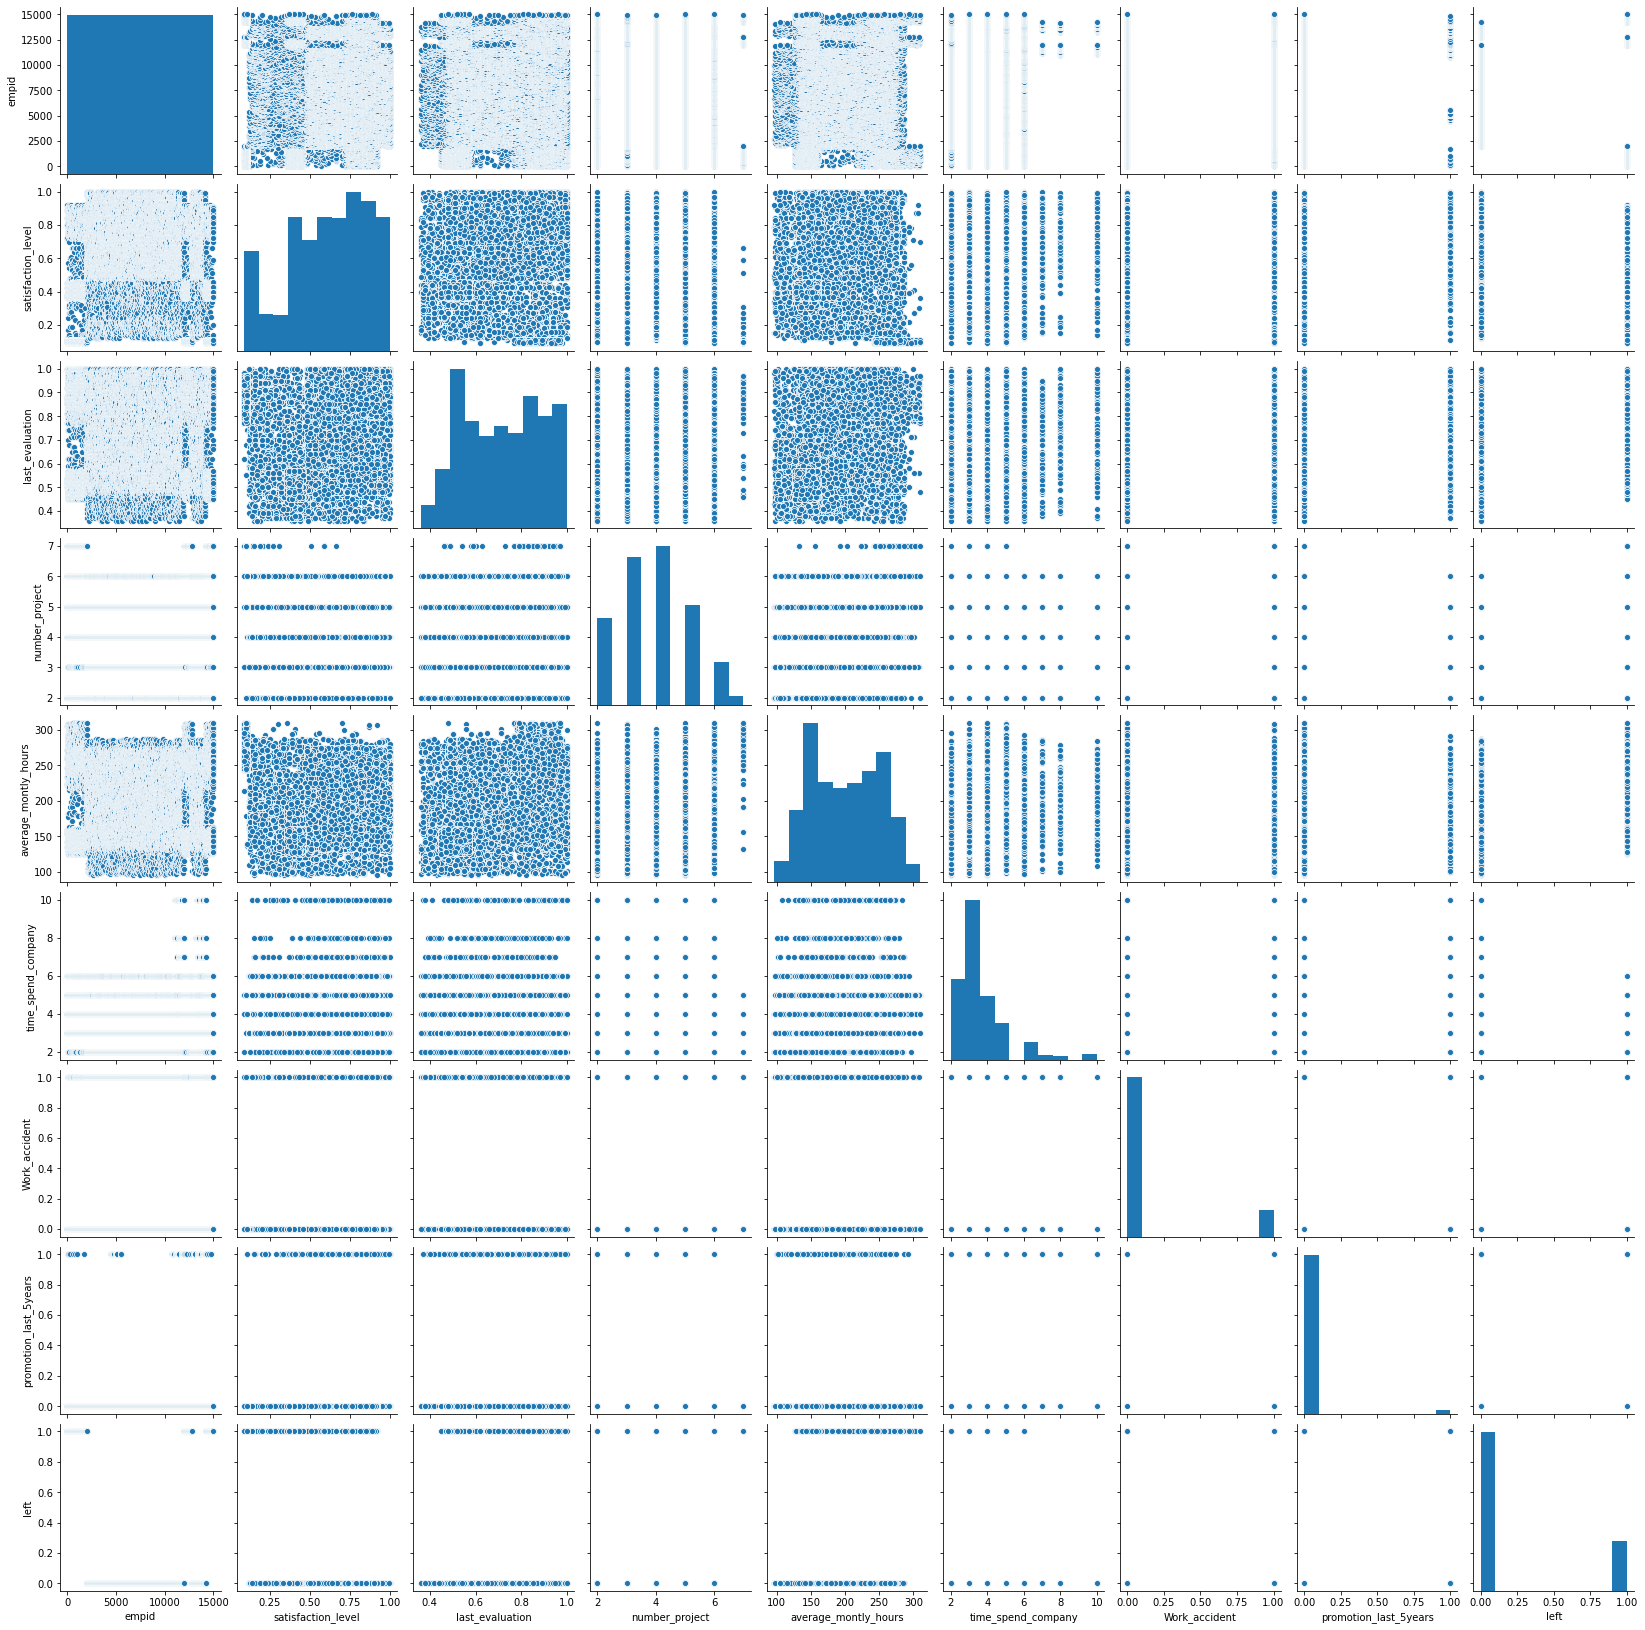

In [35]:
sns.pairplot(df)

In [36]:
from pandas_profiling import ProfileReport

In [37]:
# will try to get all extra details using profile Report

In [38]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/23 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
#Feature Engineering

In [10]:
df2= df.copy()

In [11]:
df2.drop(['empid'],axis=1,inplace=True)

In [12]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0     low     1  
1                   6              0                      0  medium     1  
2                   4              0                      0  medium     1  
3                   5              0                      0     low     1  
4                   3              0                      0     low     1

In [13]:
df2.isnull().sum()

satisfaction_level       2
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [14]:
df2['satisfaction_level'].describe()

count    14997.000000
mean         0.612863
std          0.248634
min          0.090000
25%          0.440000
50%          0.640000
75%          0.820000
max          1.000000
Name: satisfaction_level, dtype: float64

In [15]:
df2['satisfaction_level'].fillna(df2['satisfaction_level'].mean(),inplace=True)

In [16]:
df2.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
salary                   0
left                     0
dtype: int64

In [17]:
#handle the categorical features  like salary using get dummies

In [18]:
df2['salary'].unique()

array(['low', 'medium', 'high'], dtype=object)

In [19]:
df2['salary']=df2['salary'].replace({'low':0, 'medium':1, 'high':2})

In [22]:
df2

satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
14994                   151                   3              0   
14995                   160                   3              0   
14996                   143                   3              0   
14997                   280                   4              0   
14998                   158                   3              0   

       promotion_last_5years  salary  left  
0                          0       0     1  
1                          0       1     1  
2                          0       1     1  
3                          0       0     1  
4                          0       0     1  
...                      ...     ...   ...  
14994                      0       0     1  
14995                      0       0     1  
14996                      0       0     1  
14997                      0       0     1  
14998                      0       0     1  

[14999 rows x 9 columns]

In [21]:
df2.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0                0.38             0.53               2                   157   
1                0.80             0.86               5                   262   
2                0.11             0.88               7                   272   
3                0.72             0.87               5                   223   
4                0.37             0.52               2                   159   

   time_spend_company  Work_accident  promotion_last_5years  salary  left  
0                   3              0                      0       0     1  
1                   6              0                      0       1     1  
2                   4              0                      0       1     1  
3                   5              0                      0       0     1  
4                   3              0                      0       0     1

In [28]:
# split data set in train test

In [23]:
x=df2.drop(columns='left',axis=1)
y=df2['left']

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [25]:
# Model Selection

In [32]:
! pip install xgboost

In [26]:
# creating Random forest classification and xgboost classification model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [28]:
model_param = {
    'RandomForestClassifier':{
        'model':RandomForestClassifier(),
        'param':{
            'n_estimators': [10, 50, 100, 130], 
            'criterion': ['gini', 'entropy'],
            'max_depth': range(2, 4, 1), 
            'max_features': ['auto', 'log2']
        }
    },
    'XGBClassifier':{
        'model':XGBClassifier(objective='binary:logistic'),
        'param':{
           'learning_rate': [0.5, 0.1, 0.01, 0.001],
            'max_depth': [3, 5, 10, 20],
            'n_estimators': [10, 50, 100, 200]
        }
    }
}

In [29]:
scores =[]
for model_name, mp in model_param.items():
    model_selection = GridSearchCV(estimator=mp['model'],param_grid=mp['param'],cv=5,return_train_score=False)
    model_selection.fit(x_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': model_selection.best_score_,
        'best_params': model_selection.best_params_
    })

D:\User\Software\Apps\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:15:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:15:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[16:16:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [30]:
scores

[{'model': 'RandomForestClassifier',
  'best_score': 0.9166600319577602,
  'best_params': {'criterion': 'entropy',
   'max_depth': 3,
   'max_features': 'auto',
   'n_estimators': 130}},
 {'model': 'XGBClassifier',
  'best_score': 0.9884155898290954,
  'best_params': {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}}]

In [31]:
model_xgb = XGBClassifier(objective='binary:logistic',learning_rate=0.5,max_depth=10,n_estimators=50)

In [32]:
model_xgb.fit(x_train,y_train)

[16:17:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.5, max_delta_step=0,
              max_depth=10, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=50, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [33]:
model_xgb.score(x_test,y_test)

0.9903333333333333

In [34]:
model_xgb.predict(x_test[:1])

array([1], dtype=int64)

In [35]:
#confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,model_xgb.predict(x_test))

In [36]:
cm

array([[2290,    9],
       [  20,  681]], dtype=int64)

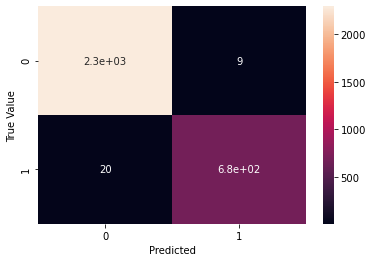

In [37]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [38]:
import pickle

In [44]:
pickle.dump(model_xgb,open("HR_Retention_Prediction.sav","wb"))

In [45]:
r= pickle.load(open('HR_Retention_Prediction.sav', 'rb'))

In [46]:
r.predict(x_test[:1])

array([1], dtype=int64)

In [47]:
x_test[:1]


satisfaction_level  last_evaluation  number_project  \
1670                0.44             0.57               2   

      average_montly_hours  time_spend_company  Work_accident  \
1670                   141                   3              0   

      promotion_last_5years  salary  
1670                      0       1